# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [17]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | If you can’t fly First Class...
1,Not Verified | Singapore to Heathrow. Busine...
2,Not Verified | I reported my damaged/ruined ...
3,"Not Verified | On March 1st, I flew from Ber..."
4,Not Verified | The WORST customer experience! ...


In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('data_BA_reviews.csv')

# Display the first few rows to understand the structure of the data
df.head()


,Unnamed: 0,reviews
0,0,✅ Trip Verified | If you can’t fly First Class...
1,1,Not Verified | Singapore to Heathrow. Busine...
2,2,Not Verified | I reported my damaged/ruined ...
3,3,"Not Verified | On March 1st, I flew from Ber..."
4,4,Not Verified | The WORST customer experience! ...


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [2]:
# Remove columns not needed
df = df[['reviews']]

# Display the first few rows to check the changes
df.head()


,reviews
0,✅ Trip Verified | If you can’t fly First Class...
1,Not Verified | Singapore to Heathrow. Busine...
2,Not Verified | I reported my damaged/ruined ...
3,"Not Verified | On March 1st, I flew from Ber..."
4,Not Verified | The WORST customer experience! ...


In [4]:
#normalize text-data by converting to lowercase, removing punctuation marks, etc.
import re
import string

# Function to clean text
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(f"[{string.punctuation}]", "", text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'✅ trip verified|not verified', '', text)  # Remove specific phrases
    return text

# Apply the clean_text function
df['cleaned_review'] = df['reviews'].apply(clean_text)

# Display the first few rows to check the changes
df.head()


,reviews,cleaned_review
0,✅ Trip Verified | If you can’t fly First Class...,if you can’t fly first class don’t fly briti...
1,Not Verified | Singapore to Heathrow. Busine...,singapore to heathrow business class on an...
2,Not Verified | I reported my damaged/ruined ...,i reported my damagedruined suitcase week...
3,"Not Verified | On March 1st, I flew from Ber...",on march st i flew from berlin to são paul...
4,Not Verified | The WORST customer experience! ...,the worst customer experience british airway...


In [5]:
#sentiment analysis
from textblob import TextBlob

# Function to get sentiment
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply sentiment function
df['sentiment'] = df['cleaned_review'].apply(get_sentiment)

# Display the first few rows to check the changes
df.head()


,reviews,cleaned_review,sentiment
0,✅ Trip Verified | If you can’t fly First Class...,if you can’t fly first class don’t fly briti...,-0.132353
1,Not Verified | Singapore to Heathrow. Busine...,singapore to heathrow business class on an...,-0.174722
2,Not Verified | I reported my damaged/ruined ...,i reported my damagedruined suitcase week...,-0.342857
3,"Not Verified | On March 1st, I flew from Ber...",on march st i flew from berlin to são paul...,0.028333
4,Not Verified | The WORST customer experience! ...,the worst customer experience british airway...,0.009028


In [6]:
#topic modelling with LDA Scikit-learn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the text
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['cleaned_review'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Display topics
for idx, topic in enumerate(lda.components_):
    print(f"Topic #{idx+1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


Topic #1:
['airways', 'flights', 'british', 'london', 'good', 'food', 'time', 'service', 'ba', 'flight']
Topic #2:
['service', 'airline', 'passengers', 'understand', 'ground', 'club', 'food', 'cabin', 'crew', 'ba']
Topic #3:
['food', 'cabin', 'good', 'boarding', 'service', 'crew', 'business', 'ba', 'class', 'flight']
Topic #4:
['cabin', 'service', 'crew', 'economy', 'business', 'class', 'seats', 'ba', 'seat', 'flight']
Topic #5:
['airport', 'london', 'service', 'told', 'hours', 'airways', 'british', 'customer', 'ba', 'flight']


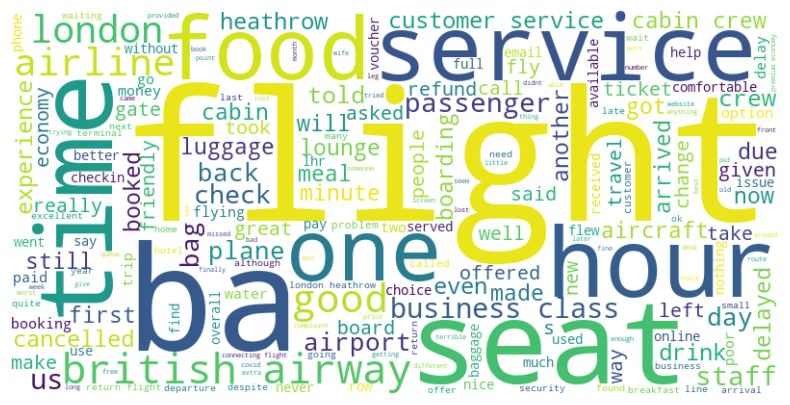

In [7]:
#word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews into a single string
all_reviews = ' '.join(df['cleaned_review'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [8]:
#insights with python
# Summary of Sentiment Analysis
sentiment_summary = df['sentiment'].describe()
print("Sentiment Analysis Summary:")
print(sentiment_summary)

# Key Topics
print("\nKey Topics Identified:")
for idx, topic in enumerate(lda.components_):
    print(f"Topic #{idx+1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

# Common Words
common_words = df['cleaned_review'].str.split(expand=True).stack().value_counts().head(10)
print("\nMost Common Words:")
print(common_words)


Sentiment Analysis Summary:
count    1000.000000
mean        0.059580
std         0.198452
min        -0.766667
25%        -0.054609
50%         0.046819
75%         0.176153
max         0.715000
Name: sentiment, dtype: float64

Key Topics Identified:
Topic #1:
['airways', 'flights', 'british', 'london', 'good', 'food', 'time', 'service', 'ba', 'flight']
Topic #2:
['service', 'airline', 'passengers', 'understand', 'ground', 'club', 'food', 'cabin', 'crew', 'ba']
Topic #3:
['food', 'cabin', 'good', 'boarding', 'service', 'crew', 'business', 'ba', 'class', 'flight']
Topic #4:
['cabin', 'service', 'crew', 'economy', 'business', 'class', 'seats', 'ba', 'seat', 'flight']
Topic #5:
['airport', 'london', 'service', 'told', 'hours', 'airways', 'british', 'customer', 'ba', 'flight']

Most Common Words:
the       7404
to        5439
and       4532
a         3429
was       3303
i         3125
in        2106
of        2073
flight    1944
on        1837
Name: count, dtype: int64


In [10]:
#presentation
from pptx import Presentation
from pptx.util import Inches

# Create a PowerPoint presentation object
prs = Presentation()

# Add a slide with a title and content layout
slide_layout = prs.slide_layouts[1]
slide = prs.slides.add_slide(slide_layout)

# Add title
title = slide.shapes.title
title.text = "Airline Reviews Analysis"

# Add content
content = slide.placeholders[1]
content.text = (
    f"1. Sentiment Analysis:\n"
    f"- Mean Sentiment: {sentiment_summary['mean']:.2f}\n"
    f"- Std Dev: {sentiment_summary['std']:.2f}\n\n"
    "2. Key Topics:\n"
)
for idx, topic in enumerate(lda.components_):
    content.text += f"- Topic #{idx+1}: " + ", ".join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-5:]]) + "\n"

content.text += "\n3. Common Words:\n" + ", ".join(common_words.index)

# Save the presentation
prs.save(r'C:\Users\uchek\Documents\GitHub\Projects\data\Airline_Review_Insights.pptx')


sentiment_category
Positive    620
Negative    370
Neutral      10
Name: count, dtype: int64


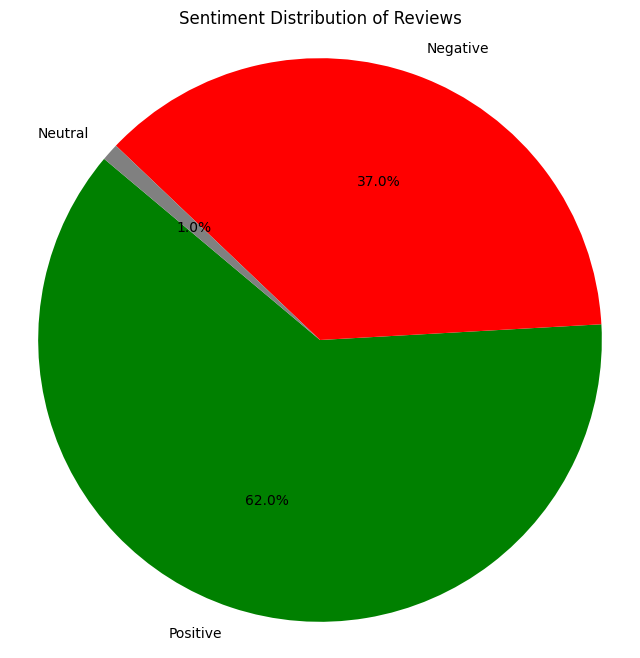

In [11]:
#visualizations
# Categorize reviews based on sentiment score
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)

# Display the first few rows to check the changes
df.head()

# Count the number of reviews in each sentiment category
sentiment_counts = df['sentiment_category'].value_counts()

# Display the counts
print(sentiment_counts)

import matplotlib.pyplot as plt

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['green', 'red', 'gray'])
plt.title('Sentiment Distribution of Reviews')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()


In [12]:
# Filter reviews by sentiment category
positive_reviews = df[df['sentiment_category'] == 'Positive']
negative_reviews = df[df['sentiment_category'] == 'Negative']
neutral_reviews = df[df['sentiment_category'] == 'Neutral']

# Save positive reviews to a CSV file
positive_reviews.to_csv('positive_reviews.csv', index=False)

# Save negative reviews to a CSV file
negative_reviews.to_csv('negative_reviews.csv', index=False)

# Save neutral reviews to a CSV file
neutral_reviews.to_csv('neutral_reviews.csv', index=False)

In [13]:
#negative review categories

# Define keywords for each category
keywords = {
    'Customer Service': ['customer service', 'staff', 'employee', 'attitude', 'rude', 'friendly'],
    'Facilities': ['restroom', 'bathroom', 'cleanliness', 'seat', 'comfortable', 'waiting area'],
    'Staffing Levels': ['wait time', 'queue', 'line', 'staffing', 'busy', 'peak'],
    'Signage and Navigation': ['signage', 'directions', 'navigation', 'map', 'wayfinding'],
    'Technology': ['wi-fi', 'internet', 'charging station', 'technology', 'connectivity'],
    'Specific Service Issues': ['baggage', 'luggage', 'shuttle', 'service']
}

# Function to categorize reviews based on keywords
def categorize_review(text):
    categories = []
    for category, words in keywords.items():
        if any(word in text for word in words):
            categories.append(category)
    if not categories:
        categories.append('Other')
    return categories

# Apply the categorize_review function to the negative reviews
negative_reviews['categories'] = negative_reviews['cleaned_review'].apply(categorize_review)

# Display the first few rows to check the changes
negative_reviews.head()



C:\Users\uchek\AppData\Local\Temp\ipykernel_17088\3752990910.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews['categories'] = negative_reviews['cleaned_review'].apply(categorize_review)


,reviews,cleaned_review,sentiment,sentiment_category,categories
0,✅ Trip Verified | If you can’t fly First Class...,if you can’t fly first class don’t fly briti...,-0.132353,Negative,"[Facilities, Staffing Levels]"
1,Not Verified | Singapore to Heathrow. Busine...,singapore to heathrow business class on an...,-0.174722,Negative,[Facilities]
2,Not Verified | I reported my damaged/ruined ...,i reported my damagedruined suitcase week...,-0.342857,Negative,"[Customer Service, Specific Service Issues]"
6,✅ Trip Verified | Flight cancelled with no rea...,flight cancelled with no reason given less t...,-0.424074,Negative,"[Customer Service, Staffing Levels, Specific S..."
8,✅ Trip Verified | While BA may have made some...,while ba may have made some positive improv...,-0.088708,Negative,"[Facilities, Specific Service Issues]"


In [15]:

# Function to save reviews to CSV based on category
def save_reviews_by_category(df, category):
    category_df = df[df['categories'].apply(lambda x: category in x)]
    category_df.to_csv(f'negative_reviews_{category.replace(" ", "_").lower()}.csv', index=False)

# Save reviews for each category
for category in keywords.keys():
    save_reviews_by_category(negative_reviews, category)

# Save reviews that don't fit into the predefined categories
other_reviews = negative_reviews[negative_reviews['categories'].apply(lambda x: 'Other' in x)]
other_reviews.to_csv('negative_reviews_other.csv', index=False)


C:\Users\uchek\AppData\Local\Temp\ipykernel_17088\881055681.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews['categories'] = negative_reviews['cleaned_review'].apply(categorize_review)


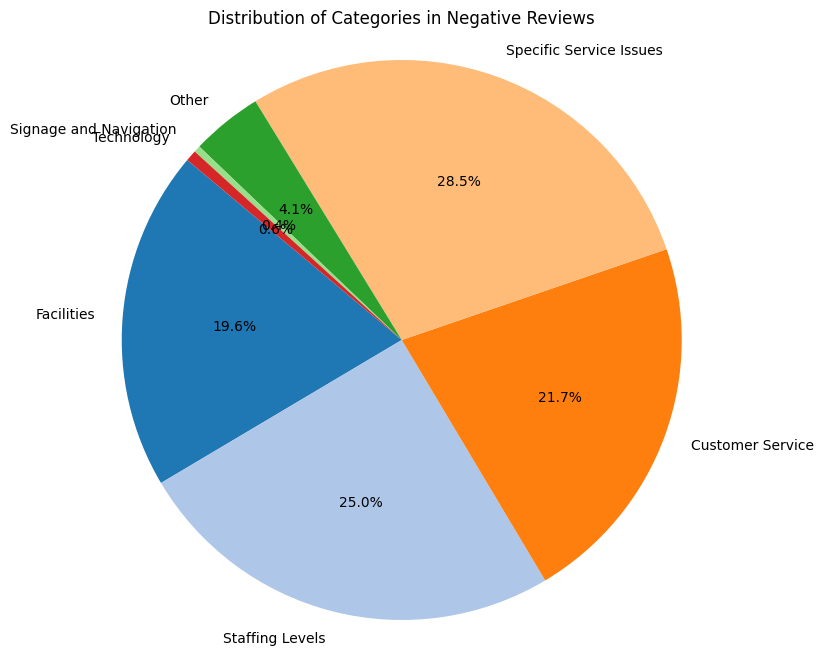

In [17]:
#negative reviews categories
import pandas as pd
import re
import string
from textblob import TextBlob
import matplotlib.pyplot as plt
from collections import Counter


# Define keywords for each category
keywords = {
    'Customer Service': ['customer service', 'staff', 'employee', 'attitude', 'rude', 'friendly'],
    'Facilities': ['restroom', 'bathroom', 'cleanliness', 'seat', 'comfortable', 'waiting area'],
    'Staffing Levels': ['wait time', 'queue', 'line', 'staffing', 'busy', 'peak'],
    'Signage and Navigation': ['signage', 'directions', 'navigation', 'map', 'wayfinding'],
    'Technology': ['wi-fi', 'internet', 'charging station', 'technology', 'connectivity'],
    'Specific Service Issues': ['baggage', 'luggage', 'shuttle', 'service']
}

# Function to categorize reviews based on keywords
def categorize_review(text):
    categories = []
    for category, words in keywords.items():
        if any(word in text for word in words):
            categories.append(category)
    if not categories:
        categories.append('Other')
    return categories

# Apply the categorize_review function to the negative reviews
negative_reviews['categories'] = negative_reviews['cleaned_review'].apply(categorize_review)

# Count the number of reviews in each category
category_counts = Counter([category for sublist in negative_reviews['categories'] for category in sublist])

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(category_counts.values(), labels=category_counts.keys(), autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribution of Categories in Negative Reviews')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()
